In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

df = pd.read_csv("FinancialData.csv", encoding="latin-1")


In [2]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [3]:
df.keys()[0]

'neutral'

In [4]:
df.keys()[1]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [5]:
df.shape


(4845, 2)

In [6]:
df2=pd.DataFrame([[df.keys()[0], df.keys()[1]]], columns=list([df.keys()[0], df.keys()[1]]), index=[4845])

In [7]:
df2.head()


,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
4845,neutral,"According to Gran , the company has no plans t..."


In [10]:
df3=df.append(df2).set_axis(['sentiment', 'comment'], axis=1)


In [11]:
df3.head()


,sentiment,comment
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [12]:
df3.isna().sum()


sentiment    0
comment      0
dtype: int64

In [13]:
df3.dtypes


sentiment    object
comment      object
dtype: object

In [21]:
df3["sentiment"].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


/Users/pradeepvallepalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

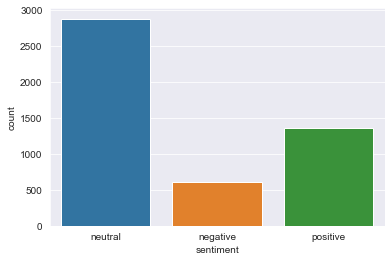

In [23]:
sns.countplot(df3["sentiment"])

In [25]:
df3['length']  = df3['comment'].str.len()

In [26]:
df3.head()


,sentiment,comment,length
0,neutral,Technopolis plans to develop in stages an area...,190
1,negative,The international electronic industry company ...,228
2,positive,With the new production plant the company woul...,206
3,positive,According to the company 's updated strategy f...,203
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,178


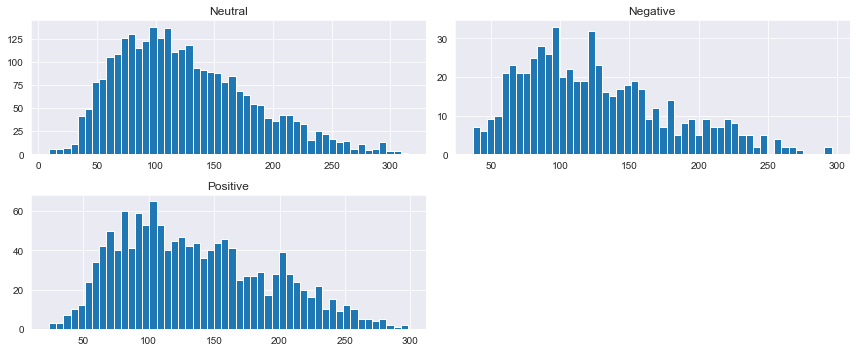

In [27]:
plt.figure(figsize=(12,5))

plt.subplot(2,2,1)
plt.hist(df3[df3["sentiment"]=="neutral"]['length'], bins=50)
plt.title("Neutral")

plt.subplot(2,2,2)
plt.hist(df3[df3["sentiment"]=="negative"]['length'], bins=50)
plt.title("Negative")

plt.subplot(2,2,3)
plt.hist(df3[df3["sentiment"]=="positive"]['length'], bins=50)
plt.title("Positive")

plt.tight_layout()

plt.show()

In [28]:
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [29]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [30]:
df3["comment"].head().apply(text_process)

0    [Technopolis, plans, develop, stages, area, le...
1    [international, electronic, industry, company,...
2    [new, production, plant, company, would, incre...
3    [According, company, updated, strategy, years,...
4    [FINANCING, ASPOCOMP, GROWTH, Aspocomp, aggres...
Name: comment, dtype: object

In [32]:
bagofwords_transformer = CountVectorizer(analyzer=text_process).fit(df3["comment"])


In [33]:
print(len(bagofwords_transformer.vocabulary_))

12278


In [34]:
df_bow = bagofwords_transformer.transform(df3['sentiment'])

In [35]:
df_bow

<4846x12278 sparse matrix of type '<class 'numpy.int64'>'
	with 4846 stored elements in Compressed Sparse Row format>

In [37]:
message5 = df3['comment'][4]
bow5 = bagofwords_transformer.transform([message5])
print(bow5)
print(bow5.shape)

  (0, 1558)	1
  (0, 1771)	1
  (0, 2920)	1
  (0, 3112)	1
  (0, 3221)	1
  (0, 4636)	1
  (0, 6429)	1
  (0, 6832)	1
  (0, 7130)	1
  (0, 7641)	1
  (0, 8388)	1
  (0, 8615)	1
  (0, 8881)	1
  (0, 10306)	1
  (0, 10442)	1
  (0, 11398)	1
  (0, 11601)	1
(1, 12278)


In [38]:
tfidf_transformer = TfidfTransformer().fit(df_bow)

In [39]:
tfidf5 = tfidf_transformer.transform(bow5)
print(tfidf5)


  (0, 11601)	0.24253562503633297
  (0, 11398)	0.24253562503633297
  (0, 10442)	0.24253562503633297
  (0, 10306)	0.24253562503633297
  (0, 8881)	0.24253562503633297
  (0, 8615)	0.24253562503633297
  (0, 8388)	0.24253562503633297
  (0, 7641)	0.24253562503633297
  (0, 7130)	0.24253562503633297
  (0, 6832)	0.24253562503633297
  (0, 6429)	0.24253562503633297
  (0, 4636)	0.24253562503633297
  (0, 3221)	0.24253562503633297
  (0, 3112)	0.24253562503633297
  (0, 2920)	0.24253562503633297
  (0, 1771)	0.24253562503633297
  (0, 1558)	0.24253562503633297


In [40]:
models = {
    "                   Logistic_Regression": LogisticRegression(),
    "        K-Nearest Neighbors_Classifier": KNeighborsClassifier(n_neighbors=9),
    "                Naive_Bayes_Classifier": MultinomialNB(),
    "              Random_Forest_Classifier": RandomForestClassifier()
}

In [42]:
pipelines={}

X_train, X_test, y_train, y_test = train_test_split(df3['comment'], df3['sentiment'], test_size=0.3, random_state=101)


In [43]:
def train(X_train, y_train):
    for name, model in models.items():
    
        print(name+"_pipeline created!")
        model_pipeline = Pipeline([
        
        ('bagofwords', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
        ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
        (name, model),# train on TF-IDF vectors w/ classifier
        
        ])
    
        model_pipeline.fit(X_train, y_train)
        print(name+"_pipeline trained!")
    
        pipelines.update({name: model_pipeline})


In [44]:
def test(X_train, X_test, y_train, y_test):
    
    for name, model in pipelines.items():
        print(name)
        print("--------------------"*3)
        print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
        print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
        print("--------------------"*3)
        print('\n')    

In [45]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [47]:
pipelines={}

X_train, X_test, y_train, y_test = train_test_split(df3['comment'], df3['sentiment'], test_size=0.3, random_state=101)


In [48]:
train(X_train, y_train)

                   Logistic_Regression_pipeline created!
                   Logistic_Regression_pipeline trained!
        K-Nearest Neighbors_Classifier_pipeline created!
        K-Nearest Neighbors_Classifier_pipeline trained!
                Naive_Bayes_Classifier_pipeline created!
                Naive_Bayes_Classifier_pipeline trained!
              Random_Forest_Classifier_pipeline created!
              Random_Forest_Classifier_pipeline trained!


In [49]:
test(X_train, X_test, y_train, y_test)

                   Logistic_Regression
------------------------------------------------------------
Testing Accuracy: 0.73040
Training Accuracy: 0.86144
------------------------------------------------------------


        K-Nearest Neighbors_Classifier
------------------------------------------------------------
Testing Accuracy: 0.69670
Training Accuracy: 0.75147
------------------------------------------------------------


                Naive_Bayes_Classifier
------------------------------------------------------------
Testing Accuracy: 0.68226
Training Accuracy: 0.75855
------------------------------------------------------------


              Random_Forest_Classifier
------------------------------------------------------------
Testing Accuracy: 0.72765
Training Accuracy: 0.99941
------------------------------------------------------------




In [50]:
for name, model in pipelines.items():
    evalModel(name, model)


                   Logistic_Regression

Confusion Matrix
[[ 49  94  24]
 [  6 824  41]
 [ 11 216 189]]

Classifiation Report
              precision    recall  f1-score   support

    negative       0.74      0.29      0.42       167
     neutral       0.73      0.95      0.82       871
    positive       0.74      0.45      0.56       416

    accuracy                           0.73      1454
   macro avg       0.74      0.56      0.60      1454
weighted avg       0.73      0.73      0.70      1454

        K-Nearest Neighbors_Classifier

Confusion Matrix
[[ 61  81  25]
 [ 23 812  36]
 [ 44 232 140]]

Classifiation Report
              precision    recall  f1-score   support

    negative       0.48      0.37      0.41       167
     neutral       0.72      0.93      0.81       871
    positive       0.70      0.34      0.45       416

    accuracy                           0.70      1454
   macro avg       0.63      0.54      0.56      1454
weighted avg       0.69      0.70      0.66